In [22]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import datetime as dt
matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False 
pd.options.display.float_format = '{:.2f}'.format
# from tqdm import tqdm
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
scale =pd.read_csv('SCALE불량.csv', engine = 'python', encoding ='CP949')
scale.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


### SCALE	Scale불량  
SPEC	제품 규격  
STEEL_KIND	강종  
PT_THICK	Plate 뚜께  
PT_WIDTH	Plate 폭  
PT_LENGTH	Plate 길이  
PT_WEIGHT	Plate 중량  
FUR_NO	가열로 호기  
FUR_NO_ROW	가열로 작업순번  
FUR_HZ_TEMP	가열로 가열대 온도  
FUR_HZ_TIME	가열로 가열대 시간  
FUR_SZ_TEMP	가열로 균열대 온도  
FUR_SZ_TIME	가열로 균열대 시간  
FUR_TIME	가열로 시간  
FUR_EXTEMP	추출온도  
ROLLING_TEMP_T5	압연온도  
HSB	HSB적용(1-적용,0-미적용)  
ROLLING_DESCALING	압연 중 Descaling 횟수  
WORK_GR	작업조


In [3]:
scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

### 이상치 확인
#### 모든 변수 이상치 없음

In [4]:
scale.isna().sum().to_frame(name = '이상치')

,이상치
PLATE_NO,0
ROLLING_DATE,0
SCALE,0
SPEC,0
STEEL_KIND,0
PT_THK,0
PT_WDTH,0
PT_LTH,0
PT_WGT,0
FUR_NO,0


EDA를 하기위한 파생 변수 생성 및 변수 이름 변경

In [5]:
#변수명 변경
col_list = scale.columns
col_name = ['강판번호','작업날짜','SCALE','제품규격','강종','두께','폭','길이','중량','호기','작업순번', '가열대온도', '가열대시간','균열대온도',
'균열대시간','가열로시간','추출온도','압연온도','HSB적용여부', 'Descaling횟수','작업조']
for i in range(20):
    scale.rename(columns = {col_list[i] : col_name[i]}, inplace =True)

    

In [6]:
scale.sort_values(by ='작업날짜',inplace =True)
scale

,강판번호,작업날짜,SCALE,제품규격,강종,두께,폭,길이,중량,호기,...,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,HSB적용여부,Descaling횟수,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,PB563500,2008-08-02:13:35:24,양품,NV-A32,C0,18.11,3260,40586,37620,1호기,...,1174,66,1160,71,240,1160,965,적용,10,3조
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1164,1005,적용,8,2조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1163,948,적용,10,4조
714,PB563501,2008-08-02:14:40:33,양품,LR-A,C0,18.92,3401,41455,20940,1호기,...,1142,55,1151,86,246,1151,948,적용,10,4조


In [16]:
scale['작업날'] = scale['작업날짜'].apply(lambda x : pd.to_datetime(x[:10] + " " +  x[11:13]))
scale['SCALE'] =scale['SCALE'].apply(lambda x : 1 if x =='불량' else 0)

In [8]:
scale['작업시간'] = scale['작업날'].apply(lambda x : str(x)[11:13])

## EDA 과정

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

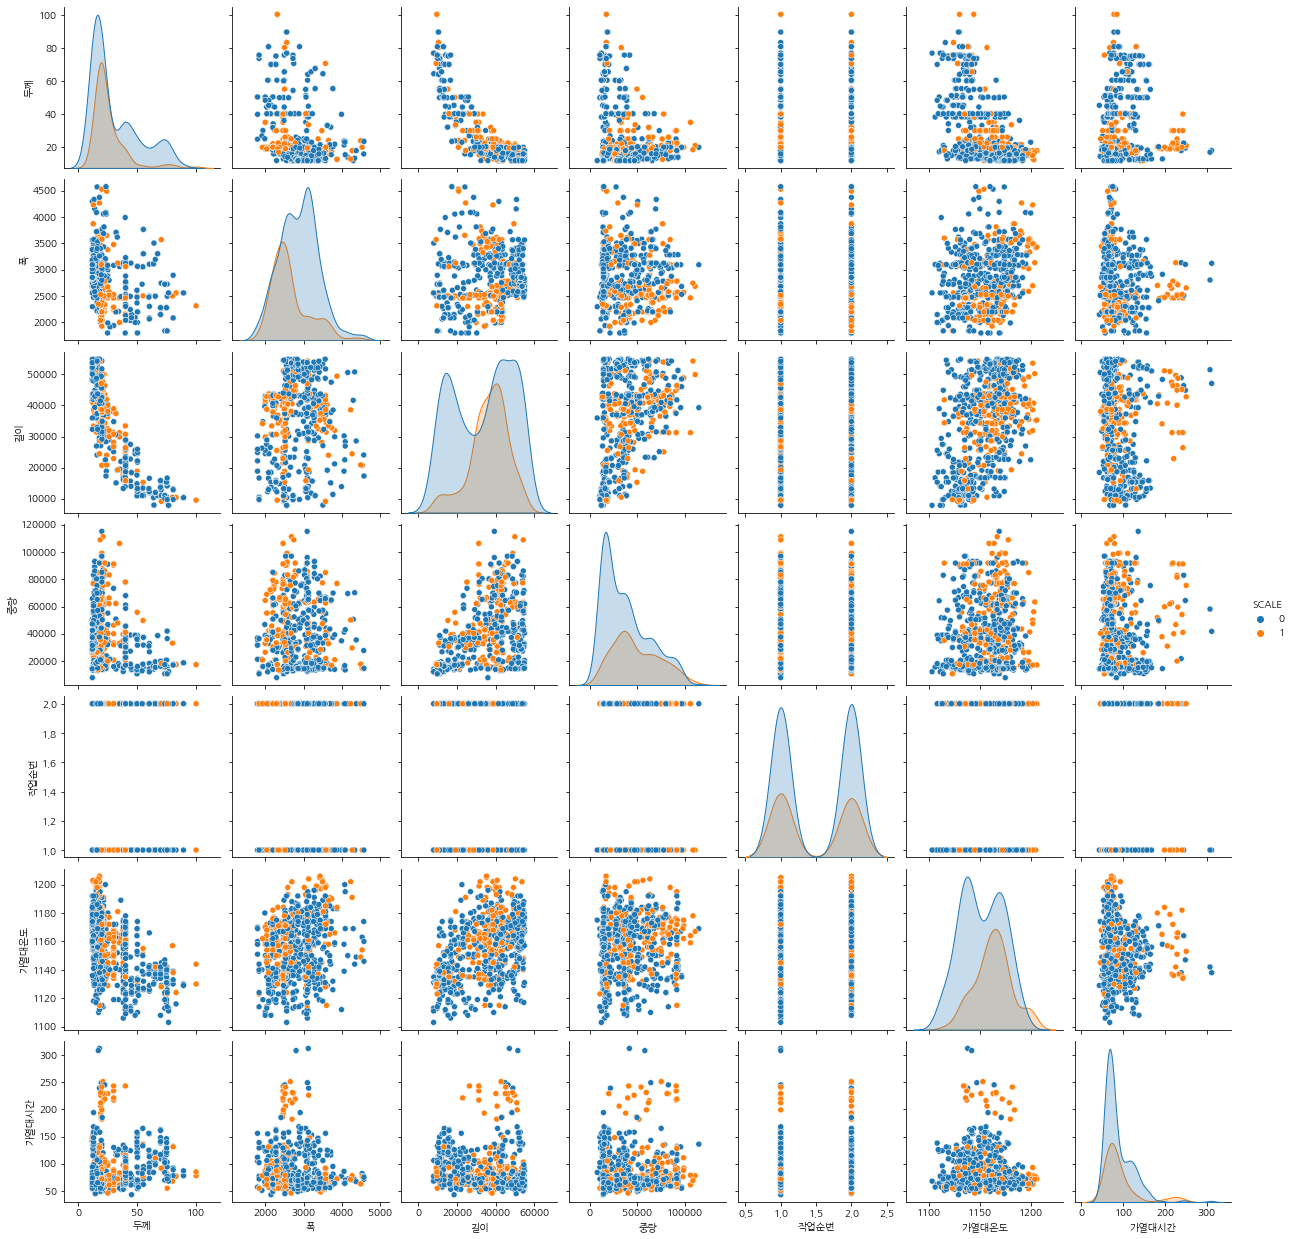

In [34]:
sns.pairplot(scale,vars = ['두께','폭','길이','중량','작업순번', '가열대온도', '가열대시간'],hue ='SCALE')
plt.xticks(fontsize =10)
# plt.xlabel(fontsize= 10)
plt.yticks(fontsize =10)
# plt.ylabal(fontsize = 10)

/home/piai/anaconda3/envs/rapids-0.17/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/piai/anaconda3/envs/rapids-0.17/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/piai/anaconda3/envs/rapids-0.17/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/piai/anaconda3/envs/rapids-0.17/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/piai/anaconda3/envs/rapids-0.17/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/piai/anaconda3/envs/rapi

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

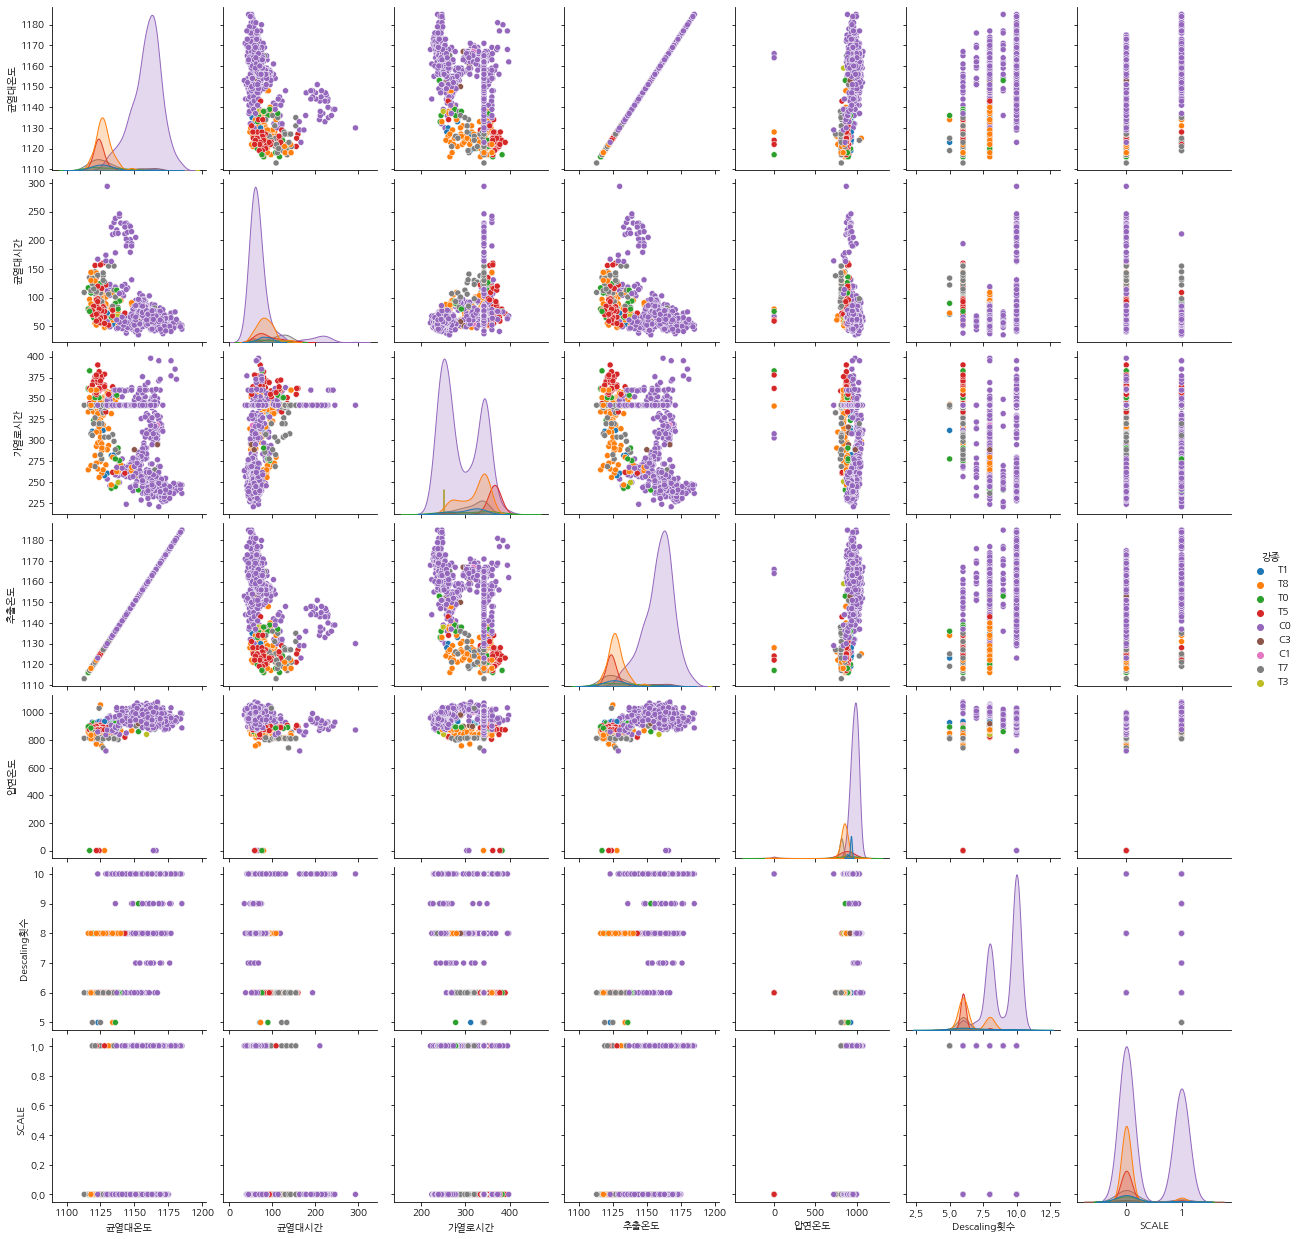

In [36]:
sns.pairplot(scale,vars = ['균열대온도','균열대시간','가열로시간','추출온도','압연온도','Descaling횟수','SCALE'],hue ='강종')
plt.xticks(fontsize =10)
# plt.xlabel(fontsize= 10)
plt.yticks(fontsize =10)
# plt.ylabal(fontsize = 10)

In [17]:
A = scale['SCALE'].value_counts().to_frame(name ='count').T
A
A['불량율'] = A[1] / (A[0] + A[1]) 
display(A)

,0,1,불량율
count,489,231,0.32


### 압연 공정에서 발생한 전체적인 불량율은  32%이다. 
### 가장 먼저 작업 시간별 불량율을 확인해보겠다. 

In [18]:
b = scale.groupby(['작업시간','SCALE']).size().to_frame(name ='count').reset_index()
c = scale.pivot_table( index =['작업시간'], values ='SCALE', aggfunc ='mean')

In [19]:
c.rename(columns = {'SCALE' : '시간별 불량율'}, inplace =True)
c = c.reset_index()

In [20]:
c.T.head(24)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
작업시간,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
시간별 불량율,0.09,0.00,0.06,0.06,0.18,0.04,0.11,0.82,0.57,0.74,...,0.19,0.25,0.29,0.46,0.35,0.00,0.08,0.10,0.17,0.06


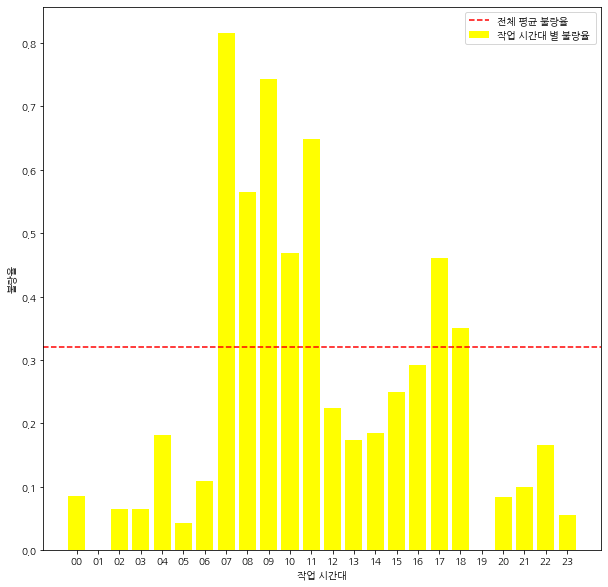

In [21]:
plt.bar(c['작업시간'],c['시간별 불량율'], color = 'yellow', label ='작업 시간대 별 불량율 ')
plt.axhline(0.32,c='r',linestyle='--',label='전체 평균 불량율')
plt.ylabel('불량율')
plt.xlabel('작업 시간대')
plt.legend()

In [252]:
scale

,강판번호,작업날짜,SCALE,제품규격,강종,두께,폭,길이,중량,호기,...,균열대온도,균열대시간,가열로시간,추출온도,압연온도,HSB적용여부,Descaling횟수,WORK_GR,작업날,작업시간
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1133,59,282,1133,934,적용,8,2조,2008-08-01 00:00:00,00
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1135,53,283,1135,937,적용,8,2조,2008-08-01 00:00:00,00
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1121,55,282,1121,889,적용,8,3조,2008-08-01 00:00:00,00
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1127,68,316,1127,885,적용,8,3조,2008-08-01 00:00:00,00
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1128,48,314,1128,873,적용,8,1조,2008-08-01 00:00:00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,PB563500,2008-08-02:13:35:24,0,NV-A32,C0,18.11,3260,40586,37620,1호기,...,1160,71,240,1160,965,적용,10,3조,2008-08-02 13:00:00,13
715,PB563502,2008-08-02:13:35:36,1,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1164,62,245,1164,1005,적용,8,2조,2008-08-02 13:00:00,13
717,PB563504,2008-08-02:14:40:00,0,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1163,77,247,1163,948,적용,10,4조,2008-08-02 14:00:00,14
714,PB563501,2008-08-02:14:40:33,0,LR-A,C0,18.92,3401,41455,20940,1호기,...,1151,86,246,1151,948,적용,10,4조,2008-08-02 14:00:00,14


### 작업시간대 중 전체 불량율 32%보다 높은 시간대는 총 7시간 존재했으며, 다음과 같다.  
### 07시,08시,09시,10시,11시,17시,18시

In [247]:
scale['SCALE'] =scale['SCALE'].astype('object')

In [250]:
def hour_data_check(df, hour_list):
    for i in hour_list:
        print('------작업시간 {}시의 기술 통계량 및 변수별 빈도 확인-----'.format(i))
        hour_scale =df[df['작업시간'] ==i]
        display(hour_scale.describe(include ='object'))
        display(hour_scale.describe())
        

In [251]:
hour_data_check(scale, ['07','08','09','10','11','17','18'])

------작업시간 07시의 기술 통계량 및 변수별 빈도 확인-----


,강판번호,작업날짜,SCALE,제품규격,강종,호기,HSB적용여부,WORK_GR,작업시간
count,49,49,49,49,49,49,49,49,49
unique,49,47,2,17,1,3,2,4,1
top,PB563336,2008-08-01:07:75:52,1,JS-SM490YB,C0,1호기,적용,3조,07
freq,1,2,40,14,49,17,47,14,49


,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수
count,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00
mean,21.17,2603.43,41986.16,66537.76,1.49,1161.94,160.06,1161.33,69.18,337.45,1161.33,1011.86,8.67
std,5.31,189.95,6912.52,22787.86,0.51,13.64,60.96,6.48,27.14,13.94,6.48,20.11,1.16
min,14.06,2433.00,22916.00,13200.00,1.00,1134.00,57.00,1148.00,37.00,311.00,1148.00,949.00,6.00
25%,19.13,2469.00,39981.00,50640.00,1.00,1155.00,111.00,1157.00,59.00,328.00,1157.00,1001.00,8.00
50%,20.10,2532.00,43220.00,64380.00,1.00,1165.00,135.00,1163.00,64.00,342.00,1163.00,1014.00,8.00
75%,21.15,2655.00,46374.00,82920.00,2.00,1171.00,221.00,1166.00,72.00,342.00,1166.00,1024.00,10.00
max,40.16,3133.00,53904.00,115080.00,2.00,1184.00,251.00,1171.00,194.00,360.00,1171.00,1071.00,10.00


------작업시간 08시의 기술 통계량 및 변수별 빈도 확인-----


,강판번호,작업날짜,SCALE,제품규격,강종,호기,HSB적용여부,WORK_GR,작업시간
count,46,46,46,46,46,46,46,46,46
unique,46,44,2,17,2,3,2,4,1
top,PB562930,2008-08-01:08:81:45,1,LR-A,C0,3호기,적용,3조,08
freq,1,2,26,8,43,16,43,15,46


,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수
count,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00
mean,24.04,2490.13,41802.98,49613.91,1.52,1169.20,75.41,1162.74,60.98,326.39,1162.74,997.20,8.67
std,12.75,191.63,10694.12,28069.46,0.51,6.73,18.35,3.37,9.20,17.68,3.37,44.11,1.42
min,13.06,2000.00,10511.00,13090.00,1.00,1155.00,58.00,1155.00,42.00,295.00,1155.00,901.00,6.00
25%,15.94,2464.00,36510.00,30050.00,1.00,1165.00,67.25,1160.25,55.00,309.75,1160.25,965.00,8.00
50%,20.10,2520.00,42675.00,42630.00,2.00,1169.00,74.00,1162.50,59.00,336.00,1162.50,1003.00,8.00
75%,31.55,2610.75,50741.50,62467.50,2.00,1174.00,78.00,1165.00,67.00,342.00,1165.00,1029.25,10.00
max,80.28,2795.00,54917.00,111200.00,2.00,1182.00,185.00,1169.00,84.00,342.00,1169.00,1078.00,10.00


------작업시간 09시의 기술 통계량 및 변수별 빈도 확인-----


,강판번호,작업날짜,SCALE,제품규격,강종,호기,HSB적용여부,WORK_GR,작업시간
count,39,39,39,39,39,39,39,39,39
unique,39,38,2,12,2,3,2,4,1
top,PB562948,2008-08-01:09:92:22,1,SA283-C,C0,2호기,적용,4조,09
freq,1,2,29,11,38,14,38,17,39


,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수
count,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00
mean,20.07,2225.69,39880.79,57852.82,1.51,1164.46,68.72,1161.85,68.49,332.54,1161.85,984.95,8.59
std,1.85,139.85,3666.54,20408.76,0.51,8.26,10.00,5.42,9.54,23.20,5.42,162.79,0.97
min,16.09,1929.00,31256.00,13870.00,1.00,1147.00,49.00,1150.00,54.00,295.00,1150.00,0.00,7.00
25%,19.11,2200.00,38019.00,41850.00,1.00,1159.50,61.50,1158.00,61.00,314.00,1158.00,999.00,8.00
50%,20.10,2200.00,40384.00,65200.00,2.00,1165.00,67.00,1162.00,67.00,342.00,1162.00,1011.00,8.00
75%,20.18,2262.50,43160.00,72400.00,2.00,1171.00,76.00,1165.50,74.00,342.00,1165.50,1025.00,10.00
max,26.24,2583.00,45600.00,92600.00,2.00,1182.00,99.00,1177.00,87.00,398.00,1177.00,1044.00,10.00


------작업시간 10시의 기술 통계량 및 변수별 빈도 확인-----


,강판번호,작업날짜,SCALE,제품규격,강종,호기,HSB적용여부,WORK_GR,작업시간
count,49,49,49,49,49,49,49,49,49
unique,49,48,2,18,2,3,2,4,1
top,PB562966,2008-08-01:10:02:10,0,JS-SM490A,C0,3호기,적용,1조,10
freq,1,2,26,14,48,17,48,17,49


,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수
count,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00
mean,24.76,2460.71,40339.49,38729.59,1.49,1164.27,74.76,1159.88,73.63,301.96,1159.88,969.63,8.88
std,17.54,222.92,11089.41,22423.50,0.51,16.45,10.57,7.70,17.44,42.70,7.70,145.74,1.29
min,12.05,2040.00,9547.00,7820.00,1.00,1117.00,50.00,1137.00,41.00,246.00,1137.00,0.00,6.00
25%,16.09,2288.00,30730.00,20420.00,1.00,1156.00,66.00,1156.00,60.00,269.00,1156.00,959.00,8.00
50%,19.12,2379.00,42759.00,33260.00,1.00,1164.00,74.00,1158.00,76.00,290.00,1158.00,993.00,10.00
75%,30.13,2695.00,49754.00,48150.00,2.00,1173.00,82.00,1163.00,87.00,328.00,1163.00,1022.00,10.00
max,100.34,2784.00,54743.00,91840.00,2.00,1202.00,98.00,1181.00,103.00,395.00,1181.00,1050.00,10.00


------작업시간 11시의 기술 통계량 및 변수별 빈도 확인-----


,강판번호,작업날짜,SCALE,제품규격,강종,호기,HSB적용여부,WORK_GR,작업시간
count,57,57,57,57,57,57,57,57,57
unique,57,57,2,19,1,3,1,4,1
top,PB563438,2008-08-01:11:13:16,1,JS-SM490A,C0,1호기,적용,4조,11
freq,1,1,37,10,57,20,57,18,57


,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수
count,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00,57.00
mean,22.75,2484.37,38010.95,43448.07,1.49,1156.46,79.74,1154.74,60.60,264.04,1154.74,998.28,8.51
std,9.12,306.82,9815.89,15857.77,0.50,13.47,17.55,7.12,12.16,13.20,7.12,35.97,1.35
min,12.05,2000.00,16858.00,13460.00,1.00,1129.00,45.00,1137.00,38.00,238.00,1137.00,909.00,6.00
25%,16.14,2288.00,30730.00,33260.00,1.00,1148.00,68.00,1151.00,52.00,254.00,1151.00,975.00,8.00
50%,20.10,2500.00,36558.00,41760.00,1.00,1157.00,78.00,1155.00,59.00,261.00,1155.00,1007.00,8.00
75%,26.24,2685.00,42940.00,52360.00,2.00,1168.00,97.00,1159.00,68.00,277.00,1159.00,1025.00,10.00
max,50.19,3128.00,54853.00,76400.00,2.00,1184.00,107.00,1168.00,97.00,290.00,1168.00,1053.00,10.00


------작업시간 17시의 기술 통계량 및 변수별 빈도 확인-----


,강판번호,작업날짜,SCALE,제품규격,강종,호기,HSB적용여부,WORK_GR,작업시간
count,26,26,26,26,26,26,26,26,26
unique,26,26,2,13,2,3,2,4,1
top,PB563161,2008-08-01:17:75:28,0,NV-A,C0,3호기,적용,2조,17
freq,1,1,14,10,25,9,23,9,26


,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수
count,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00
mean,16.51,3388.58,39554.19,42559.62,1.54,1185.77,65.65,1173.12,55.73,243.77,1173.12,944.96,9.69
std,2.94,210.70,7265.63,26899.09,0.51,14.21,9.02,8.28,8.09,5.03,8.28,29.55,0.74
min,12.05,2875.00,29914.00,14240.00,1.00,1159.00,48.00,1155.00,45.00,237.00,1155.00,882.00,8.00
25%,14.34,3275.00,35193.25,16665.00,1.00,1180.25,60.50,1168.00,51.00,240.25,1168.00,932.25,10.00
50%,15.84,3421.50,37528.00,38500.00,2.00,1186.00,66.00,1173.50,55.00,243.00,1173.50,936.50,10.00
75%,18.11,3549.75,41784.25,59325.00,2.00,1197.75,72.00,1179.00,58.75,247.00,1179.00,959.50,10.00
max,23.16,3812.00,54267.00,93050.00,2.00,1206.00,81.00,1185.00,79.00,256.00,1185.00,998.00,10.00


------작업시간 18시의 기술 통계량 및 변수별 빈도 확인-----


,강판번호,작업날짜,SCALE,제품규격,강종,호기,HSB적용여부,WORK_GR,작업시간
count,20,20,20,20,20,20,20,20,20
unique,20,19,2,11,5,3,2,4,1
top,PB563162,2008-08-01:18:80:41,0,NV-A32,C0,1호기,적용,3조,18
freq,1,2,13,4,9,8,17,8,20


,두께,폭,길이,중량,작업순번,가열대온도,가열대시간,균열대온도,균열대시간,가열로시간,추출온도,압연온도,Descaling횟수
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
mean,18.01,2899.00,41142.65,48922.50,1.45,1176.30,63.35,1156.90,61.95,245.20,1156.90,923.80,9.45
std,3.89,494.00,9367.59,25820.31,0.51,22.71,8.11,14.87,8.99,7.78,14.87,51.46,0.83
min,13.06,1800.00,22524.00,16680.00,1.00,1129.00,51.00,1130.00,44.00,236.00,1130.00,823.00,8.00
25%,15.08,2696.75,36043.25,23620.00,1.00,1166.75,55.75,1149.00,57.00,240.75,1149.00,891.25,9.00
50%,18.10,3035.50,41786.00,49510.00,1.00,1181.00,63.00,1160.50,62.50,243.00,1160.50,919.50,10.00
75%,18.75,3104.25,48535.00,63015.00,2.00,1194.25,71.25,1167.75,68.00,247.25,1167.75,972.25,10.00
max,27.00,4075.00,54544.00,91850.00,2.00,1204.00,79.00,1176.00,75.00,262.00,1176.00,989.00,10.00


In [47]:
def draw_graph(df, hour):
    df =df[df['작업시간']==hour]
    fig, ax = plt.subplots(3,2, figsize = (13,10))
    ax[0,0].set_title('작업시간 {}시의 두께에 따른 불량 유무 '.format(hour))
    ax[0,0].hist(df[df['SCALE']==0]['두께'], color ='b',alpha = 0.5, label ='양품')
    ax[0,0].hist(df[df['SCALE']==1]['두께'], color ='r',alpha = 0.5, label ='불량')
    ax[0,0].legend(loc ='upper right')
    
    ax[0,1].set_title('작업시간 {}시의 폭에 따른 불량 유무 '.format(hour))                  
    ax[0,1].hist(df[df['SCALE']==0]['폭'], color ='b',alpha = 0.5,label ='양품')
    ax[0,1].hist(df[df['SCALE']==1]['폭'], color ='r',alpha = 0.5, label ='불량')
    ax[0,1].legend(loc ='upper right')
    
    ax[1,0].set_title('작업시간 {}시의 길이에 따른 불량 유무 '.format(hour))                  
    ax[1,0].hist(df[df['SCALE']==0]['길이'], color ='b',alpha = 0.5,label ='양품')
    ax[1,0].hist(df[df['SCALE']==1]['길이'], color ='r',alpha = 0.5, label ='불량')
    ax[1,0].legend(loc ='upper right')
    
    ax[1,1].set_title('작업시간 {}시의 중량에 따른 불량 유무 '.format(hour))
    ax[1,1].hist(df[df['SCALE']==0]['중량'], color ='b',alpha = 0.5,label ='양품')
    ax[1,1].hist(df[df['SCALE']==1]['중량'], color ='r',alpha = 0.5, label ='불량')
    ax[1,1].legend(loc ='upper right')
    
                      
    ax[2,0].set_title('작업시간 {}시의 강종에 따른 불량 유무 '.format(hour))                      
    ax[2,0].hist(df[df['SCALE']==0]['강종'], color ='b',alpha = 0.5,label ='양품')
    ax[2,0].hist(df[df['SCALE']==1]['강종'],color ='r',alpha = 0.5, label ='불량')
    ax[2,0].legend(loc ='upper right')
    fig.tight_layout()

In [40]:
def draw_steel_kind_graph(df):
    n =0
    m =0
    fig ,ax =plt.subplots(6,4, figsize = (20,25))
    for i in scale['작업시간'].unique():
        a =df[df['작업시간']==i]
        ax[n,m].set_title('작업시간 {}시 의 생산 강종'.format(i))

        ax[n,m].hist(a[a['SCALE']== 1]['강종'],color ='black', label ='작업시간 : {}시 불량'.format(i),alpha = 0.5)
        ax[n,m].hist(a[a['SCALE']== 0]['강종'],color ='yellow', label ='작업시간 : {}시 양품'.format(i),alpha = 0.5)
        ax[n,m].legend(loc = 'upper right')
        m += 1
        if m ==4:
            m =0
            n+=1
    fig.tight_layout()


In [362]:
for i in scale['작업시간'].unique():
    a = scale[scale['작업시간']== i]
    print('작업시간 {} 시의 생산 강종 현황'.format(i))
    print('생산량 : {}'.format(a.groupby('강종').size().to_frame()[0].sum()))
    display(a['강종'].value_counts().to_frame('count').T)
    display(a.groupby(['강종','SCALE','호기']).size().to_frame(name ='count').reset_index().pivot(index= 'SCALE' , columns =['강종','호기']).fillna(0))


작업시간 00 시의 생산 강종 현황
생산량 : 35


,T5,T8,T1,T0
count,19,11,4,1


count                                             
강종       T0   T1             T5             T8          
호기      1호기  1호기  2호기  3호기  1호기  2호기  3호기  1호기  2호기  3호기
SCALE                                                   
0      1.00 2.00 1.00 0.00 7.00 5.00 6.00 3.00 4.00 3.00
1      0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00 0.00 1.00

작업시간 01 시의 생산 강종 현황
생산량 : 20


,T1,T8,T0,T5
count,10,6,2,2


count                                    
강종       T0      T1          T5      T8        
호기      1호기 3호기 1호기 2호기 3호기 1호기 2호기 1호기 2호기 3호기
SCALE                                          
0         1   1   3   4   3   1   1   3   1   2

작업시간 02 시의 생산 강종 현황
생산량 : 31


,T8,T7,T5
count,21,9,1


count                              
강종       T5   T7             T8          
호기      2호기  1호기  2호기  3호기  1호기  2호기  3호기
SCALE                                    
0      1.00 2.00 1.00 4.00 7.00 7.00 7.00
1      0.00 0.00 2.00 0.00 0.00 0.00 0.00

작업시간 03 시의 생산 강종 현황
생산량 : 31


,T8,C0,T7
count,20,7,4


count                                        
강종       C0             T7             T8          
호기      1호기  2호기  3호기  1호기  2호기  3호기  1호기  2호기  3호기
SCALE                                              
0      3.00 2.00 2.00 1.00 1.00 1.00 6.00 7.00 6.00
1      0.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00

작업시간 04 시의 생산 강종 현황
생산량 : 11


,T8
count,11


count          
강종       T8          
호기      1호기  2호기  3호기
SCALE                
0      3.00 3.00 3.00
1      1.00 0.00 1.00

작업시간 05 시의 생산 강종 현황
생산량 : 23


,C0,T8
count,13,10


count                         
강종       C0             T8          
호기      1호기  2호기  3호기  1호기  2호기  3호기
SCALE                               
0      3.00 4.00 6.00 1.00 4.00 4.00
1      0.00 0.00 0.00 1.00 0.00 0.00

작업시간 06 시의 생산 강종 현황
생산량 : 46


,C0
count,46


count        
강종       C0        
호기      1호기 2호기 3호기
SCALE              
0        15  14  12
1         1   2   2

작업시간 07 시의 생산 강종 현황
생산량 : 49


,C0
count,49


count        
강종       C0        
호기      1호기 2호기 3호기
SCALE              
0         4   3   2
1        13  13  14

작업시간 08 시의 생산 강종 현황
생산량 : 46


,C0,C3
count,43,3


count                     
강종       C0              C3     
호기      1호기  2호기   3호기  1호기  3호기
SCALE                           
0      5.00 8.00  5.00 1.00 1.00
1      7.00 8.00 10.00 1.00 0.00

작업시간 09 시의 생산 강종 현황
생산량 : 39


,C0,C1
count,38,1


count                
강종       C0              C1
호기      1호기   2호기  3호기  1호기
SCALE                      
0      5.00  3.00 2.00 0.00
1      8.00 11.00 9.00 1.00

작업시간 10 시의 생산 강종 현황
생산량 : 49


,C0,C3
count,48,1


count                
강종       C0              C3
호기      1호기  2호기   3호기  3호기
SCALE                      
0      7.00 8.00 10.00 1.00
1      9.00 8.00  6.00 0.00

작업시간 11 시의 생산 강종 현황
생산량 : 57


,C0
count,57


count        
강종       C0        
호기      1호기 2호기 3호기
SCALE              
0         8   6   6
1        12  12  13

작업시간 12 시의 생산 강종 현황
생산량 : 49


,C0
count,49


count        
강종       C0        
호기      1호기 2호기 3호기
SCALE              
0        12  14  12
1         4   2   5

작업시간 13 시의 생산 강종 현황
생산량 : 46


,C0,C3
count,44,2


count                
강종       C0              C3
호기      1호기   2호기  3호기  3호기
SCALE                      
0     12.00 15.00 9.00 2.00
1      2.00  0.00 6.00 0.00

작업시간 14 시의 생산 강종 현황
생산량 : 27


,C0
count,27


count          
강종       C0          
호기      1호기  2호기  3호기
SCALE                
0     10.00 5.00 7.00
1      0.00 4.00 1.00

작업시간 15 시의 생산 강종 현황
생산량 : 24


,C0
count,24


count        
강종       C0        
호기      1호기 2호기 3호기
SCALE              
0         4   6   8
1         3   2   1

작업시간 16 시의 생산 강종 현황
생산량 : 24


,C0
count,24


count        
강종       C0        
호기      1호기 2호기 3호기
SCALE              
0         5   6   6
1         3   2   2

작업시간 17 시의 생산 강종 현황
생산량 : 26


,C0,C3
count,25,1


count               
강종       C0             C3
호기      1호기  2호기  3호기  2호기
SCALE                     
0      5.00 6.00 2.00 1.00
1      3.00 2.00 7.00 0.00

작업시간 18 시의 생산 강종 현황
생산량 : 20


,C0,T0,T1,T7,T5
count,9,4,3,2,2


count                                             
강종       C0             T0        T1        T5        T7
호기      1호기  2호기  3호기  1호기  2호기  1호기  3호기  1호기  2호기  2호기
SCALE                                                   
0      3.00 1.00 0.00 1.00 2.00 1.00 1.00 1.00 1.00 2.00
1      1.00 0.00 4.00 1.00 0.00 0.00 1.00 0.00 0.00 0.00

작업시간 19 시의 생산 강종 현황
생산량 : 15


,T8,T3,T7,T1
count,11,2,1,1


count                        
강종       T1  T3      T7  T8        
호기      1호기 2호기 3호기 3호기 1호기 2호기 3호기
SCALE                              
0         1   1   1   1   3   4   4

작업시간 20 시의 생산 강종 현황
생산량 : 12


,T8,T7,T0
count,5,4,3


count                              
강종       T0   T7             T8          
호기      3호기  1호기  2호기  3호기  1호기  2호기  3호기
SCALE                                    
0      2.00 2.00 1.00 1.00 2.00 2.00 1.00
1      1.00 0.00 0.00 0.00 0.00 0.00 0.00

작업시간 21 시의 생산 강종 현황
생산량 : 10


,T7
count,10


count          
강종       T7          
호기      1호기  2호기  3호기
SCALE                
0      3.00 3.00 3.00
1      0.00 1.00 0.00

작업시간 22 시의 생산 강종 현황
생산량 : 12


,T5,T7,T0
count,6,5,1


count                    
강종       T0   T5        T7     
호기      3호기  1호기  2호기  1호기  3호기
SCALE                          
0      1.00 2.00 4.00 2.00 1.00
1      0.00 0.00 0.00 0.00 2.00

작업시간 23 시의 생산 강종 현황
생산량 : 18


,T5,T0
count,13,5


count                    
강종       T0        T5          
호기      1호기  3호기  1호기  2호기  3호기
SCALE                          
0      1.00 4.00 5.00 5.00 2.00
1      0.00 0.00 0.00 1.00 0.00

# 00시 ~03시 100% 강종 T(탄소공구강) 생산
# 03시 ~05시 강종 T와 C0가 혼합되어 생산
# 06시 ~07시까지 100% 강종 C0만 생산
# 08시 ~10시까지 강종 C0 , C3 혼합생산
# 11시 ~12시까지 100% 강종 C0
# 이후 17시까지 강종 C0, C3 혼합생산
# 18시부터 강종 C0 와 T 혼합생산
# 19시 부터 100% T 강종 23시까지 생산

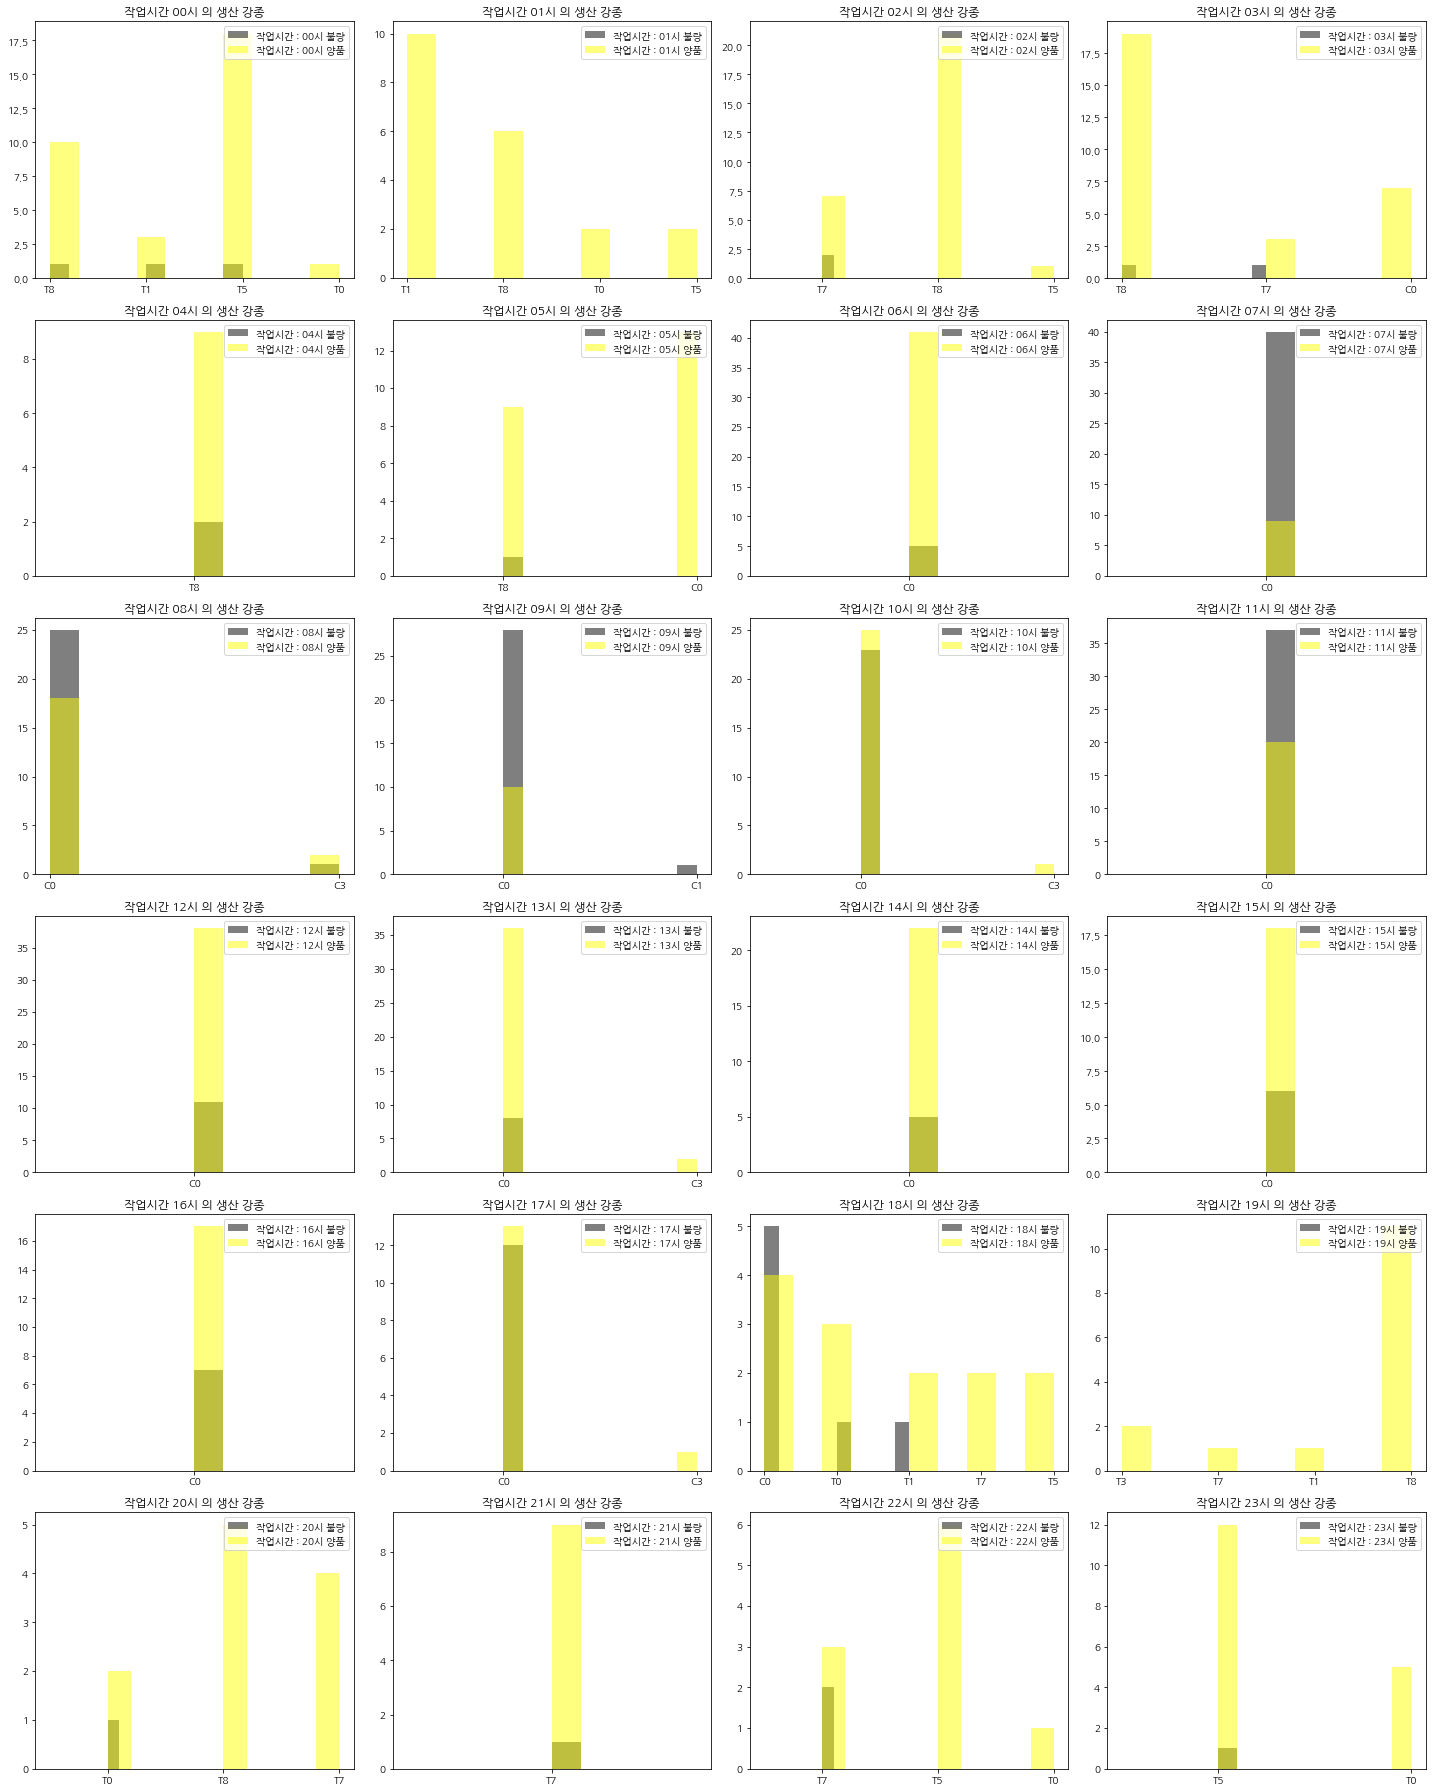

In [45]:
draw_steel_kind_graph(scale)

### 강종별 불량 확인

In [82]:
steel_problem =scale.groupby(['강종','SCALE']).size().to_frame(name ='count').reset_index().pivot_table(index ='강종', columns=['SCALE'], values ='count')
steel_problem['불량율'] = (steel_problem[1] /(steel_problem[0] + steel_problem[1]))*100
steel_problem.fillna(0, inplace =True)
steel_problem.T.loc[:, 'C0']['불량율']

42.14711729622266

In [95]:
# 강종별 정규성 확인
def check_norm(df):
    fig ,ax = plt.subplots(nrows= 3, ncols =3 ,figsize =(15,10))
    n = 0
    m = 0
    for i in scale['강종'].unique():        
        check_df =df[df['강종']== i]
        check_df0 =check_df[check_df['SCALE']==0]
        check_df1 =check_df[check_df['SCALE']==1]
        steel_problem =scale.groupby(['강종','SCALE']).size().to_frame(name ='count').reset_index().pivot_table(index ='강종', columns=['SCALE'], values ='count')
        steel_problem['불량율'] = (steel_problem[1] /(steel_problem[0] + steel_problem[1]))*100
        steel_problem.fillna(0, inplace =True)
        
        line_df = round(steel_problem.T.loc[:, i]['불량율'], 2)
#         print(line_df)
        ax[n,m].set_title('강종 :{} 양품, 불량 수량 비교'.format(i))
        ax[n,m].hist(check_df0['SCALE'], label ='양품')
        ax[n,m].hist(check_df1['SCALE'], label ='불량')
        ax[n,m].legend(loc ='upper right')
        axt= ax[n,m].twinx()
        axt.axhline(line_df, c ='r', label ='불량율{}'.format(line_df))
        axt.legend(loc ='upper center')
        m +=1
        if m == 3:
            n+=1
            m=0
    fig.tight_layout()
        
        

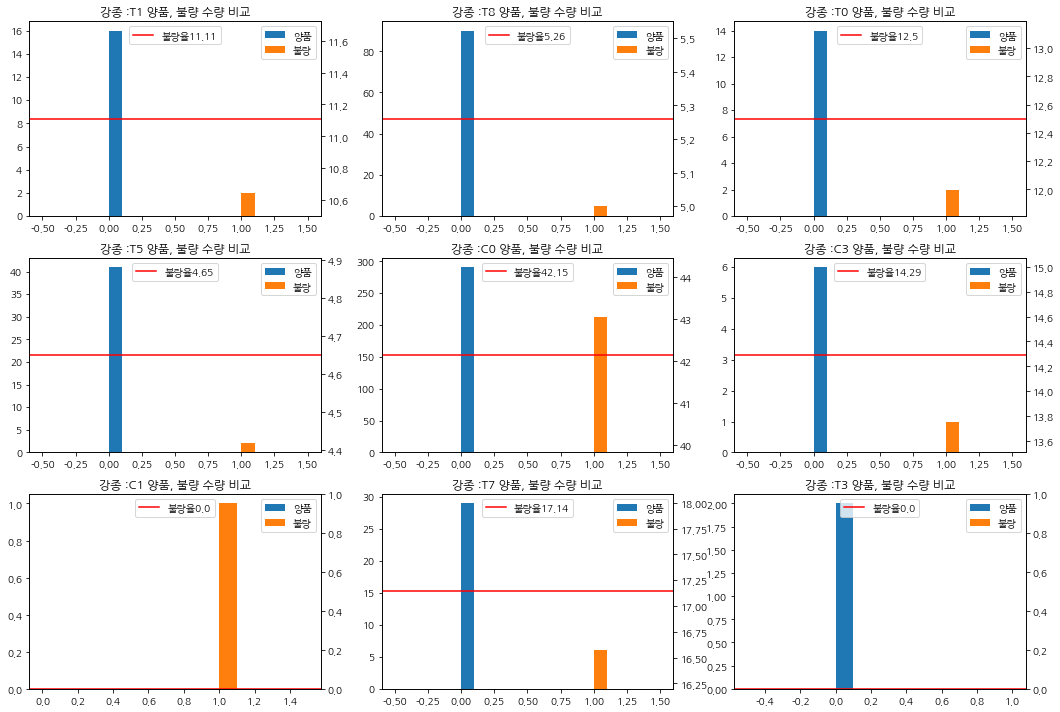

In [96]:
check_norm(scale)

### 강종별 row를 비교해 본 결과 T1, T0, T3, C1, C3 강종의 경우 데이터 수가 작아 통계적으로 원인을 파악 할 수 없을 것 같다.
### 불량율이 전체 불량율 32% 보다 높은 강종 CO를 먼저 파악해야겠다.
### 위의 불량율이 높은 작업 시간을 확인하였을 때, 해당시간의 생산 강종 중 대부분이 C0이기때문에 발생한 결과로 보인다.
